# Typing Speeds

How can you improve your typing speed?

The file `typing-speeds.csv` contains typing speed data from >168,000 people typing 15 sentences each. The data was collected via an online typing test published at a free typing speed assessment webpage.

In [8]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'typing-speeds.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd

df = pd.read_csv('typing-speeds.csv')
df

,PARTICIPANT_ID,AGE,HAS_TAKEN_TYPING_COURSE,COUNTRY,LAYOUT,NATIVE_LANGUAGE,FINGERS,KEYBOARD_TYPE,ERROR_RATE,AVG_WPM_15,ROR
0,3,30,0,US,qwerty,en,1-2,full,0.511945,61.9483,0.2288
1,5,27,0,MY,qwerty,en,7-8,laptop,0.871080,72.8871,0.3675
2,7,13,0,AU,qwerty,en,7-8,laptop,6.685633,24.1809,0.0667
3,23,21,0,IN,qwerty,en,3-4,full,2.130493,24.7112,0.0413
4,24,21,0,PH,qwerty,tl,7-8,laptop,1.893287,45.3364,0.2678
...,...,...,...,...,...,...,...,...,...,...,...
168589,517932,20,0,US,qwerty,en,9-10,laptop,8.731466,24.9125,0.1842
168590,517936,25,0,PL,qwerty,pl,9-10,laptop,0.000000,66.2946,0.0639
168591,517943,38,1,US,qwerty,en,9-10,laptop,0.147929,75.6713,0.2021
168592,517944,28,0,GB,qwerty,en,9-10,laptop,0.278552,91.7083,0.5133




| **Variable**             | **Description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| `PARTICIPANT_ID`         | Unique ID of the participant                                                   |
| `AGE`                    | Age of the participant                                                         |
| `HAS_TAKEN_TYPING_COURSE`| Whether the participant has taken a typing course (1 = Yes, 0 = No)            |
| `COUNTRY`                | Country of the participant                                                     |
| `LAYOUT`      		   | Keyboard layout used (QWERTY, AZERTY, or QWERTZ)                               |
| `NATIVE_LANGUAGE`        | Native language of the participant                                             |
| `FINGERS`                | Number of fingers used for typing (options: 1-2, 3-4, 5-6, 7-8, 9-10)          |
| `KEYBOARD_TYPE`          | Type of keyboard used (Full/desktop, laptop, small physical, or touch)         |
| `ERROR_RATE(%)`          | Uncorrected error rate (as a percentage)                                       |
| `AVG_WPM_15`             | Words per minute averaged over 15 typed sentences                              |
| `ROR`                    | Rollover ratio                                                                 |


### Project Ideas
- Remove unnecessary columns, such as PARTICIPANT_ID, to streamline the dataset.

- Rename columns (e.g `AVG_WPM_15` to `wpm`, `ROR` to `ror`, `HAS_TAKEN_TYPING_COURSE` to `course`) for brevity and clarity during analysis.

Finger Count Analysis
- Compare typing speeds across groups using different numbers of fingers, excluding the "10+" category for simplicity.

- Control for consistency by first filtering to similar `AGE`, `KEYBOARD_LAYOUT`, `NATIVE_LANGUAGE`, `KEYBOARD_TYPE`, and `HAS_TAKEN_TYPING_COURSE` values.

- Exclude participants with high error rates (ERROR_RATE > 3%) to focus on reliable data.

- Drop columns after filtering if they now only have a single value.

Rollover Ratio Analysis
- The Rollover Ratio (`ROR`) represents the proportion of keypresses where a new key is pressed before releasing the previous one.

- Compare typing speeds between participants with `ROR` ≤ 20% and those with `ROR` > 80%, keeping `AGE`, `KEYBOARD_TYPE`, `FINGERS`, and other variables constant.

Influence of Typing Course
- Compare typing speeds between participants with a typing course (`HAS_TAKEN_TYPING_COURSE` = 1) and without (`HAS_TAKEN_TYPING_COURSE` = 0), holding other variables such as `KEYBOARD_TYPE`, `AGE` range, and `FINGER_COUNT` constant.


In [2]:
# YOUR CODE HERE (add additional cells as needed)

# Remove unnecessary columns, such as PARTICIPANT_ID, to streamline the dataset.
df = df.drop(columns=["PARTICIPANT_ID"])

In [5]:
# Rename columns (e.g `AVG_WPM_15` to `wpm`, `ROR` to `ror`, `HAS_TAKEN_TYPING_COURSE` to `course`) for brevity and clarity during analysis.
df = df.rename(columns={
    "AVG_WPM_15": "wpm",
    "ROR": "ror",
    "HAS_TAKEN_TYPING_COURSE": "course",
})

In [6]:
# Compare typing speeds across groups using different numbers of fingers, excluding the "10+" category for simplicity.
df_filtered = df[df["FINGERS"] != "10+"]

In [7]:
# Exclude participants with high error rates (>3%)
df_filtered = df_filtered[df_filtered["ERROR_RATE"] <= 3]

In [8]:
# Filter to a consistent subgroup
df_filtered = df_filtered[
    (df_filtered["AGE"].between(20, 30)) &
    (df_filtered["LAYOUT"] == "qwerty") &
    (df_filtered["NATIVE_LANGUAGE"] == "en") &
    (df_filtered["KEYBOARD_TYPE"] == "full") &
    (df_filtered["course"] == 0)
]


In [9]:
# Drop now-constant columns
df_filtered = df_filtered.drop(columns=["LAYOUT", "NATIVE_LANGUAGE", "KEYBOARD_TYPE", "course"])

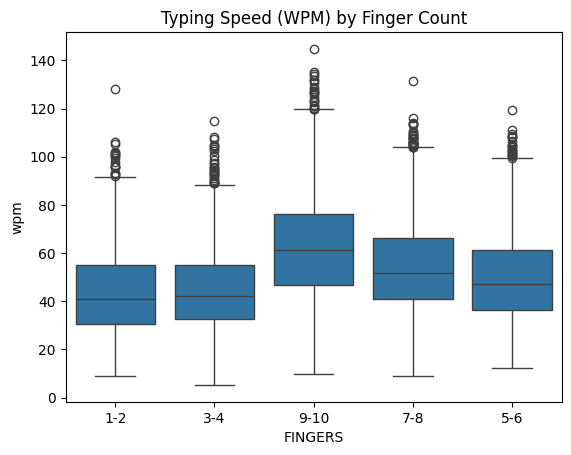

In [11]:
# Compare WPM by FINGER group
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_filtered, x="FINGERS", y="wpm")
plt.title("Typing Speed (WPM) by Finger Count")
plt.show()

In [13]:
# Rollover Ratio (ROR) Analysis
#  Create 2 ROR groups: ≤ 20% and > 80%
df_ror = df[(df["ror"] <= 0.2) | (df["ror"] > 0.8)].copy()  # <--- Add .copy() here
df_ror["ror_group"] = df_ror["ror"].apply(lambda x: "≤ 20%" if x <= 0.2 else "> 80%")


In [14]:
avg_wpm_by_ror = df_ror.groupby("ror_group")["wpm"].mean()
print(avg_wpm_by_ror)


ror_group
> 80%    98.214091
≤ 20%    37.356104
Name: wpm, dtype: float64


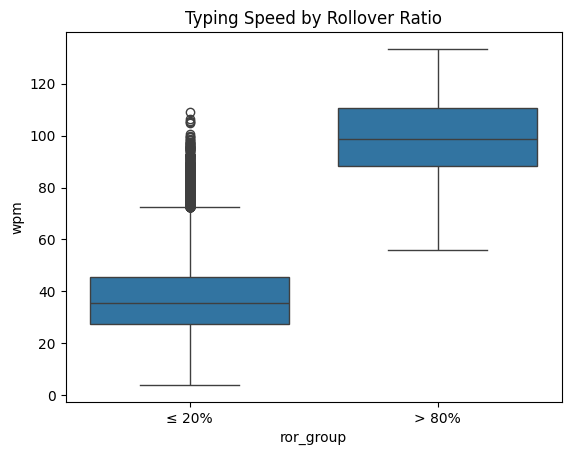

In [15]:
# Plot typing speed by ROR group
sns.boxplot(data=df_ror, x="ror_group", y="wpm")
plt.title("Typing Speed by Rollover Ratio")
plt.show()

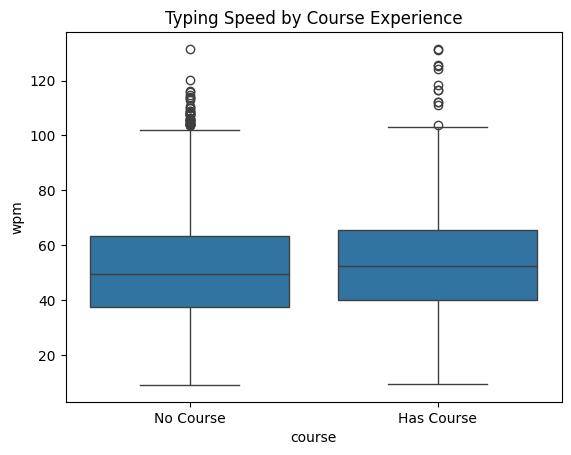

In [16]:
#  Typing Course Influence
# Compare WPM for course vs. no course

df_course = df[
    (df["AGE"].between(20, 30)) &
    (df["KEYBOARD_TYPE"] == "full") &
    (df["FINGERS"] == "7-8")
]

sns.boxplot(data=df_course, x="course", y="wpm")
plt.xticks([0, 1], ["No Course", "Has Course"])
plt.title("Typing Speed by Course Experience")
plt.show()

In [18]:
df_filtered.groupby("FINGERS")["wpm"].mean()
df_ror.groupby("ror_group")["wpm"].mean()
df_course.groupby("course")["wpm"].mean()

course
0    51.798461
1    53.754371
Name: wpm, dtype: float64